# Project 3: Web APIs and NLP <br>

#### Brandie Hatch

### Exploratory Data Analysis, Cleaning, and Feature Engineering

## Problem



Learn with Chewie presents:
Web API and NLP Services

What do the users of Reddit consider dog CARE vs. dog TRAINING?

__Data Dictionary__

Features used listed below:
| **Feature**      | **Type** | **Dataset** | **Description**                                           |
|------------------|----------|-------------|-----------------------------------------------------------|
| **subreddit**    | _object_ | df          | Subreddit Name (instance of Subreddit)                    |
| **title**        | _object_ | df          | Title of submission                                       |
| **selftext**     | _object_ | df          | Selftext of a submission (an empty string if a link post) |
| **author**       | _object_ | df          | Author (Redditor) of the submission                       |
| **name**         | _object_ | df          | Full ID of submission, prefixed with t4_                  |
| **ups**          | _int64_  | df          | Number of up-vote points for a submission                 |
| **downs**        | _int64_  | df          | Number of down-vote points for a submission               |
| **score**        | _int64_  | df          | Total points for a submission                             |
| **num_comments** | _int64_  | df          | Number of comments on the submission                      |

Created with: https://www.tablesgenerator.com/markdown_tables#                                                             

## Imports, Reading in Data, and Cleaning Data

Cleaning data will be in response to some basic EDA to create a single DataFrame that can be used for more detailed EDA to determine modeling.

In [125]:
# python library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline
pd.options.display.max_columns =999

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re


### Dog Training

In [126]:
# load data
dogtraining = pd.read_csv('../data/dogtraining.csv')
print(dogtraining.shape)
dogtraining.head(1)

(4728, 66)


,all_awardings,allow_live_comments,author,author_flair_css_class,author_flair_richtext,author_flair_text,author_flair_type,author_fullname,author_is_blocked,author_patreon_flair,author_premium,awarders,can_mod_post,contest_mode,created_utc,domain,full_link,gildings,id,is_created_from_ads_ui,is_crosspostable,is_meta,is_original_content,is_reddit_media_domain,is_robot_indexable,is_self,is_video,link_flair_background_color,link_flair_css_class,link_flair_richtext,link_flair_template_id,link_flair_text,link_flair_text_color,link_flair_type,locked,media_only,no_follow,num_comments,num_crossposts,over_18,parent_whitelist_status,permalink,pinned,pwls,retrieved_on,score,selftext,send_replies,spoiler,stickied,subreddit,subreddit_id,subreddit_subscribers,subreddit_type,thumbnail,title,total_awards_received,treatment_tags,upvote_ratio,url,whitelist_status,wls,author_cakeday,call_to_action,category,edited
0,[],False,x24musicaa,NaN,[],NaN,text,t2_79aphl10,False,False,False,[],False,False,1652811547,self.Dogtraining,https://www.reddit.com/r/Dogtraining/comments/...,{},ursq4i,False,True,False,False,False,True,True,False,#bbe179,help,[],b8ba4bb8-8347-11e9-81f2-0e1db79ad382,help,dark,text,False,False,True,1,0,False,all_ads,/r/Dogtraining/comments/ursq4i/can_a_oneyearol...,False,6,1652811558,1,Hi. I have a one-year-old golden retriever who...,True,False,False,Dogtraining,t5_2r067,367195,public,self,Can a one-year-old golden retriever be leash t...,0,[],1.0,https://www.reddit.com/r/Dogtraining/comments/...,all_ads,6,NaN,NaN,NaN,NaN


In [127]:
# remove columns that will not be needed for next steps
dogtraining = dogtraining.drop(columns=['all_awardings', 'allow_live_comments', 'author_flair_css_class', 'author_flair_richtext', 'author_flair_text', 'author_flair_type', 'author_fullname', 'author_is_blocked', 'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post', 'contest_mode', 'domain', 'full_link', 'gildings', 'is_created_from_ads_ui', 'is_crosspostable', 'is_meta', 'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video', 'link_flair_background_color', 'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id', 'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked', 'media_only', 'no_follow', 'num_crossposts', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls', 'retrieved_on', 'send_replies', 'spoiler', 'stickied', 'subreddit_id', 'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'total_awards_received', 'treatment_tags', 'upvote_ratio', 'url', 'whitelist_status', 'wls', 'author_cakeday', 'call_to_action', 'category', 'edited'])

In [128]:
print(dogtraining.shape)
dogtraining.head()

(4728, 9)


,author,created_utc,id,num_comments,over_18,score,selftext,subreddit,title
0,x24musicaa,1652811547,ursq4i,1,False,1,Hi. I have a one-year-old golden retriever who...,Dogtraining,Can a one-year-old golden retriever be leash t...
1,Kiriouka,1652809061,urrsw7,1,False,1,Recently my 13 week old rott/ lab has started ...,Dogtraining,Puppy nipping
2,Th1rdPlanet,1652808776,urrp4l,1,False,1,"Hey y'all, \n\n\nSo my fiancee and I just mo...",Dogtraining,9-year-old dog won't poop or pee at our new house
3,chefddog3,1652808168,urrh16,3,False,1,Like the title said we recently (as in late Fr...,Dogtraining,Just recently acquired rehomed an 8 month old ...
4,BlueFire751,1652807437,urr7g4,1,False,1,"We got our Aussie about a year ago, around tha...",Dogtraining,My dog loves the water too much.


The Dog Training data set includes 4728 observations of nine variables. 

In [129]:
dogtraining.isnull().sum()

author          0
created_utc     0
id              0
num_comments    0
over_18         0
score           0
selftext        0
subreddit       0
title           0
dtype: int64

In [130]:
# general statistics to see what the numeric data looks like 
# will remove downs because there are no vote downs in the data collected, so there is no reason to keep it (for space saving reasons)
dogtraining.describe()

,created_utc,num_comments,score
count,4.728000e+03,4728.000000,4728.000000
mean,1.649618e+09,0.832276,1.013113
std,1.786927e+06,1.058676,0.472915
min,1.646614e+09,0.000000,0.000000
25%,1.648057e+09,0.000000,1.000000
50%,1.649555e+09,1.000000,1.000000
75%,1.651128e+09,1.000000,1.000000
max,1.652812e+09,25.000000,32.000000


In [131]:
# dtypes for Data Dictionary above
dogtraining.dtypes

author          object
created_utc      int64
id              object
num_comments     int64
over_18           bool
score            int64
selftext        object
subreddit       object
title           object
dtype: object

In [132]:
#dogtraining.to_csv('../data/dogtraining' + '.csv', header=True, index=False)

### Dog Care

In [133]:
# read in data
dogcare = pd.read_csv('../data/dogcare.csv')
print(dogcare.shape)
dogcare.head()

(2334, 9)


,author,created_utc,id,num_comments,over_18,score,selftext,subreddit,title
0,cinnamngrl,1652808382,urrjr2,0,False,1,My building has mice and the exterminator is c...,DogCare,The exterminator is coming
1,nic823,1652804562,urq5n5,0,False,1,Hey all!\n\nI’m the owner of a nearly 1 year o...,DogCare,Blood in stool - questions.
2,Whatvotquack,1652651890,uqgmdd,0,False,1,How much on average would it cost me a month t...,DogCare,1 year old Shiba inu boxer mix. How much per m...
3,theycallmeMiriam,1652642801,uqdgkn,0,False,1,Our vet recommended we add a joint supplement ...,DogCare,joint supplement that's shellfish free?
4,xTokyoRoseGaming,1652633315,uqa46e,0,False,1,We have a beautiful 20 week old collie X kelpi...,DogCare,Rubbed Skin and Something to Soothe


In [134]:
# remove columns that will not be needed for next steps
#dogcare = dogcare.drop(columns=['all_awardings', 'allow_live_comments', 'author_flair_css_class', 'author_flair_richtext', 'author_flair_text', 'author_flair_type', 'author_fullname', 'author_is_blocked', 'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post', 'contest_mode', 'domain', 'full_link', 'gildings', 'is_created_from_ads_ui', 'is_crosspostable', 'is_meta', 'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video', 'link_flair_background_color', 'link_flair_richtext', 'link_flair_text_color', 'link_flair_type', 'locked', 'media_only', 'no_follow', 'num_crossposts', 'parent_whitelist_status', 'permalink', 'pinned', 'pwls', 'retrieved_on', 'send_replies', 'spoiler', 'stickied', 'subreddit_id', 'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'total_awards_received', 'treatment_tags', 'upvote_ratio', 'url', 'whitelist_status', 'wls', 'author_cakeday', 'edited', 'media_metadata', 'steward_reports', 'updated_utc', 'og_description', 'og_title', 'gilded', 'rte_mode', 'author_id', 'brand_safe', 'approved_at_utc', 'banned_at_utc', 'suggested_sort', 'thumbnail_height', 'thumbnail_width', 'view_count', 'author_created_utc', 'media_embed', 'secure_media_embed', 'author_flair_background_color', 'author_flair_text_color'])

In [135]:
print(dogcare.shape)
dogcare.head()

(2334, 9)


,author,created_utc,id,num_comments,over_18,score,selftext,subreddit,title
0,cinnamngrl,1652808382,urrjr2,0,False,1,My building has mice and the exterminator is c...,DogCare,The exterminator is coming
1,nic823,1652804562,urq5n5,0,False,1,Hey all!\n\nI’m the owner of a nearly 1 year o...,DogCare,Blood in stool - questions.
2,Whatvotquack,1652651890,uqgmdd,0,False,1,How much on average would it cost me a month t...,DogCare,1 year old Shiba inu boxer mix. How much per m...
3,theycallmeMiriam,1652642801,uqdgkn,0,False,1,Our vet recommended we add a joint supplement ...,DogCare,joint supplement that's shellfish free?
4,xTokyoRoseGaming,1652633315,uqa46e,0,False,1,We have a beautiful 20 week old collie X kelpi...,DogCare,Rubbed Skin and Something to Soothe


The Dog Care data set includes 2334 observations of nine variables. I could not pull more than the 2334 observations. From my investigation, I believe that many posts do not have selftext or the selftext is a url. I will modify before modeling to make a more matched set of classification (y) variables.

In [136]:
#dogcare.to_csv('../data/dogcare' + '.csv', header=True, index=False)

In [137]:
dogcare.isnull().sum()

author          0
created_utc     0
id              0
num_comments    0
over_18         0
score           0
selftext        0
subreddit       0
title           0
dtype: int64

In [138]:
# dtypes for Data Dictionary above
dogcare.dtypes

author          object
created_utc      int64
id              object
num_comments     int64
over_18           bool
score            int64
selftext        object
subreddit       object
title           object
dtype: object

In [139]:
# general statistics to see what the numeric data looks like 
# will remove downs because there are no vote downs in the data collected, so there is no reason to keep it (for space saving reasons)
dogcare.describe()

,created_utc,num_comments,score
count,2.334000e+03,2334.000000,2334.000000
mean,1.542700e+09,6.129820,2.767352
std,7.272649e+07,6.009839,2.817089
min,1.388624e+09,0.000000,0.000000
25%,1.486469e+09,2.000000,1.000000
50%,1.558551e+09,5.000000,1.000000
75%,1.602627e+09,8.000000,4.000000
max,1.652808e+09,55.000000,26.000000


In [140]:
# join the two DataFrames
df = pd.concat([dogtraining, dogcare], axis=0, ignore_index=True)

In [141]:
# remove rows with selftext nulls/NaN
df = df.dropna(axis=0)

In [142]:
# remove rows that have over_18 = True (these are likely NSFW submissions)
df = df[(df['over_18'] == False)]

In [143]:
# verifying that with the removal of rows and columns, the split between the two subreddits is approximately 50/50 (or at least really close)
df['subreddit'].value_counts(normalize=True)

Dogtraining    0.669314
DogCare        0.330686
Name: subreddit, dtype: float64

In [144]:
df.tail()

,author,created_utc,id,num_comments,over_18,score,selftext,subreddit,title
7057,bludart,1388816027,1udhrf,5,False,3,My eldest dog Maggie just got diagnosed with h...,DogCare,"Hookworm advice, &amp;, how to decontaminate t..."
7058,dji83,1388791213,1uckd6,4,False,2,have a 2 year old boxer mix. She seems to hav...,DogCare,Doggie Pimples??
7059,right_rudder,1388786986,1ucdy8,9,False,7,My dog is 5 years old. We've had a lot more s...,DogCare,Any tips or special precautions for dogs durin...
7060,[deleted],1388728041,1uajj9,8,False,4,"As the title says, my dog won't play with any ...",DogCare,Dog won't play with toys?
7061,[deleted],1388623786,1u6z84,8,False,8,Quick facts about my dog:\nHe is an 8 year old...,DogCare,My eight year old dog started pooping inside d...


In [145]:
# remove columns that will not be needed for next steps
df = df.drop(columns=['id', 'author', 'created_utc', 'over_18'])

In [146]:
# resetting index after all of the cleanup
df = df.reset_index(drop=True)

In [147]:
df['text'] = df['title'] + " " + df['selftext']

In [148]:
print(df.shape)
df.head()

(7052, 6)


,num_comments,score,selftext,subreddit,title,text
0,1,1,Hi. I have a one-year-old golden retriever who...,Dogtraining,Can a one-year-old golden retriever be leash t...,Can a one-year-old golden retriever be leash t...
1,1,1,Recently my 13 week old rott/ lab has started ...,Dogtraining,Puppy nipping,Puppy nipping Recently my 13 week old rott/ la...
2,1,1,"Hey y'all, \n\n\nSo my fiancee and I just mo...",Dogtraining,9-year-old dog won't poop or pee at our new house,9-year-old dog won't poop or pee at our new ho...
3,3,1,Like the title said we recently (as in late Fr...,Dogtraining,Just recently acquired rehomed an 8 month old ...,Just recently acquired rehomed an 8 month old ...
4,1,1,"We got our Aussie about a year ago, around tha...",Dogtraining,My dog loves the water too much.,My dog loves the water too much. We got our Au...


In [149]:
df.to_csv('../data/cleaned.csv', index=False)

## Explore Data

### Lengths of Titles and Selftext descriptions

Determining if length of Titles and Selftext descriptions is worth more review by creating new columns with lengths to analyze.

In [150]:
# create a new column called title_length that contains the length of each title

df['title_length'] = df['title'].transform(len)


In [151]:
# create a new column called title_word_count that contains the number of words in each title

df['title_word_count'] = df['title'].map(lambda x: len(x.split(' ')))

In [152]:
# create a new column called selftext_length that contains the length of each selftext

df['selftext_length'] = df['selftext'].transform(len)

In [153]:
# create a new column called selftext_word_count that contains the number of words in each selftext

df['selftext_word_count'] = df['selftext'].map(lambda x: len(x.split(' ')))

### Longest and shortest Titles and Selftext descriptions

Determining if it is worth more review by looking at the five longest and five shortest Titles and Selftext description word counts.

In [154]:
df.sort_values(by='title_word_count')['title'].head(5)

4805     Question
5203      Advice?
5278    Insurance
6564      Lizards
6744       Fleas?
Name: title, dtype: object

In [155]:
df.sort_values(by='selftext_word_count')['selftext'].head(5)

5673    &amp;#x200B;\n\n![img](wwao84hemd041)
5604    &amp;#x200B;\n\n![img](y7w8u3vhyuc41)
52                                       Thx!
3697                                    Title
6906                                        .
Name: selftext, dtype: object

In [156]:
df.sort_values(by='title_word_count', ascending=False)['title'].head(5)

3040    How do I train my 2 month old puppy how to not...
603     Please help . I have a puppy who’s 5 months an...
2011    We adapted a dog that is very sweet but she wo...
1406    We found her 3 weeks ago in the streets, she w...
1085    My boyfriend travels for work frequently and d...
Name: title, dtype: object

In [157]:
df.sort_values(by='selftext_word_count', ascending=False)['selftext'].head(5)

4401    My boyfriend (40) and I (34) have been dating ...
3352    **BACKSTORY**\n\nFirst, it's important to ment...
930     Hi all, I'm at a loss and looking for help. br...
2433    I’m 34 years old and have been in a relationsh...
2642    Hi everyone,\n\n&amp;#x200B;\n\nI think I'm go...
Name: selftext, dtype: object

__EDA Conclusion:__ Considering the data that was shown from the longest and shortest word counts, I will want to remove characters before modeling.

### Distribution of lengths of Titles and Selftext descriptions

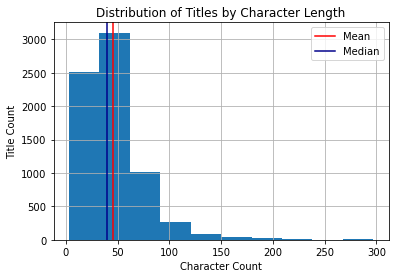

In [158]:
df['title_length'].hist()
plt.title('Distribution of Titles by Character Length')
plt.xlabel('Character Count')
plt.ylabel('Title Count')
plt.axvline(df.title_length.mean(), color='red')
plt.axvline(df.title_length.median(), color='darkblue')
plt.legend(['Mean','Median']);

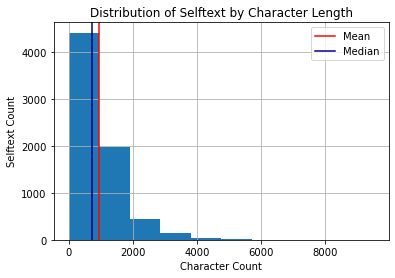

In [159]:
df['selftext_length'].hist()
plt.title('Distribution of Selftext by Character Length')
plt.xlabel('Character Count')
plt.ylabel('Selftext Count')
plt.axvline(df.selftext_length.mean(), color='red')
plt.axvline(df.selftext_length.median(), color='darkblue')
plt.legend(['Mean','Median']);

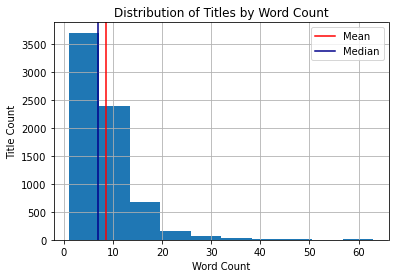

In [160]:
df['title_word_count'].hist()
plt.title('Distribution of Titles by Word Count')
plt.xlabel('Word Count')
plt.ylabel('Title Count')
plt.axvline(df.title_word_count.mean(), color='red')
plt.axvline(df.title_word_count.median(), color='darkblue')
plt.legend(['Mean','Median']);

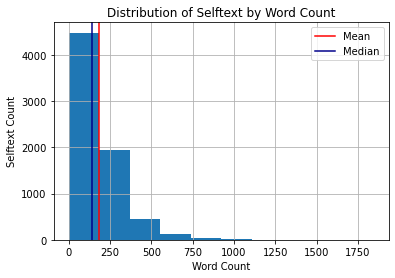

In [161]:
df['selftext_word_count'].hist()
plt.title('Distribution of Selftext by Word Count')
plt.xlabel('Word Count')
plt.ylabel('Selftext Count')
plt.axvline(df.selftext_word_count.mean(), color='red')
plt.axvline(df.selftext_word_count.median(), color='darkblue')
plt.legend(['Mean','Median']);

__EDA Conclusion 1:__ From the above plots and longest/shortest reviews, I don't believe that using the character or word counts for the titles or selftext will provide much distinction between Dog Care vs. Training. 

I'm considering other ways to look at that....

In [162]:
# subreddit mapping
df['subreddit_num'] = df['subreddit'].map({'DogCare': 0, 'Dogtraining': 1})

In [106]:
df.head()

,num_comments,score,selftext,subreddit,title,text,title_length,title_word_count,selftext_length,selftext_word_count,subreddit_num
0,1,1,Hi. I have a one-year-old golden retriever who...,Dogtraining,Can a one-year-old golden retriever be leash t...,Can a one-year-old golden retriever be leash t...,53,8,190,37,1
1,1,1,Recently my 13 week old rott/ lab has started ...,Dogtraining,Puppy nipping,Puppy nipping Recently my 13 week old rott/ la...,13,2,414,83,1
2,1,1,"Hey y'all, \n\n\nSo my fiancee and I just mo...",Dogtraining,9-year-old dog won't poop or pee at our new house,9-year-old dog won't poop or pee at our new ho...,49,10,1473,291,1
3,3,1,Like the title said we recently (as in late Fr...,Dogtraining,Just recently acquired rehomed an 8 month old ...,Just recently acquired rehomed an 8 month old ...,61,10,2280,465,1
4,1,1,"We got our Aussie about a year ago, around tha...",Dogtraining,My dog loves the water too much.,My dog loves the water too much. We got our Au...,32,7,1619,318,1


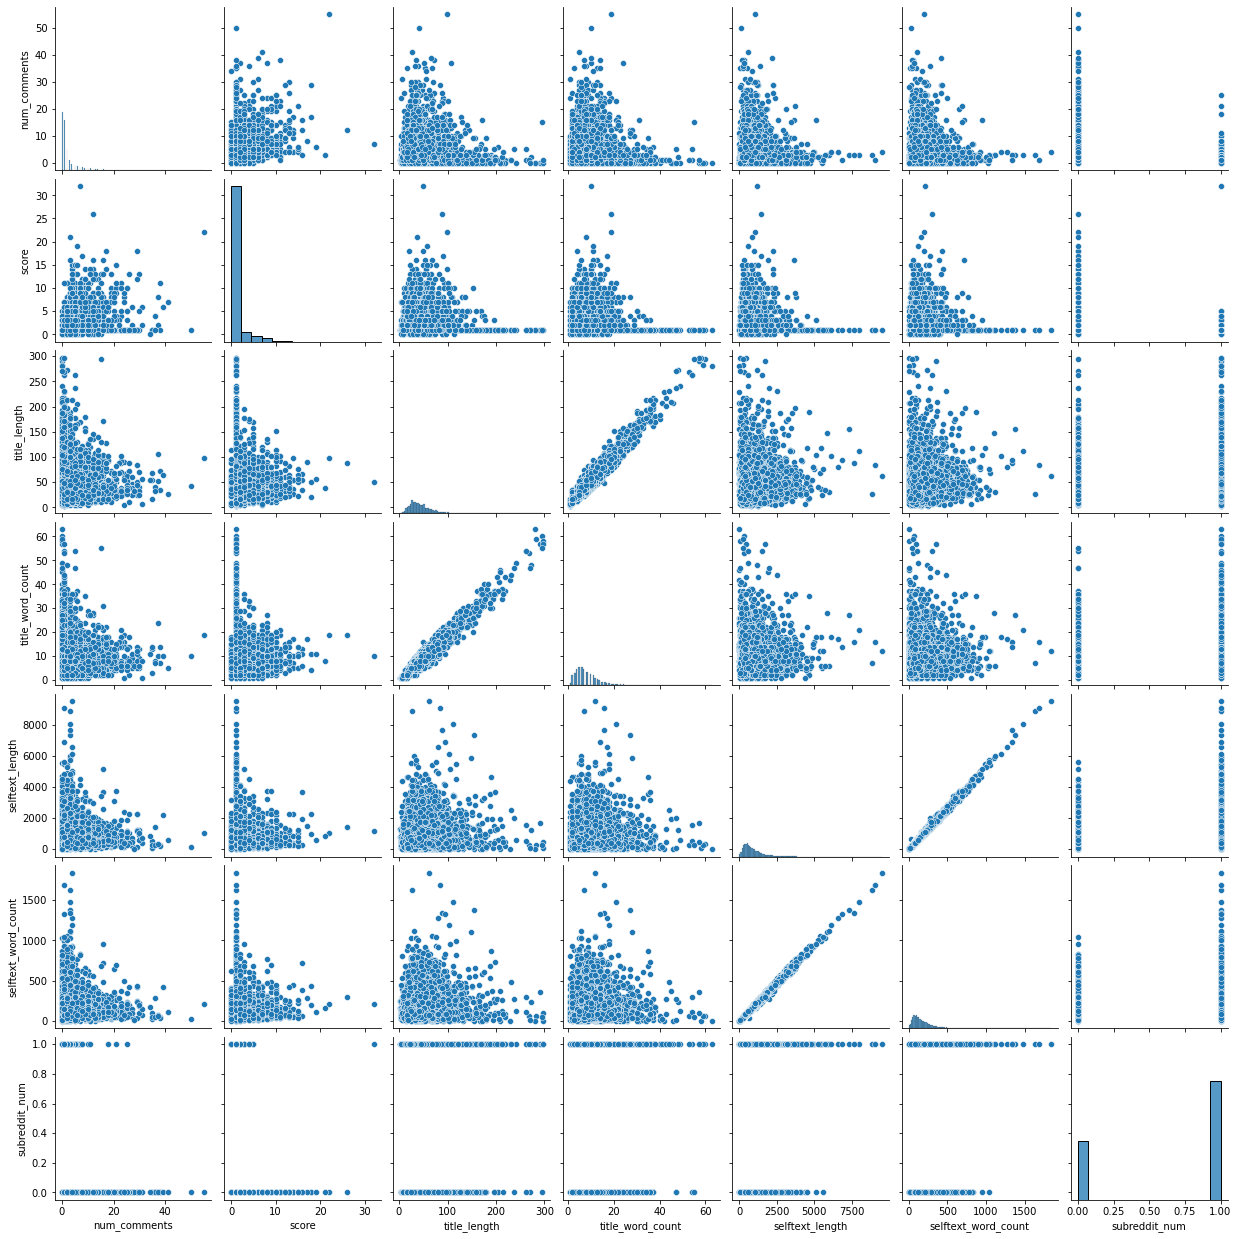

In [108]:
sns.pairplot(df);

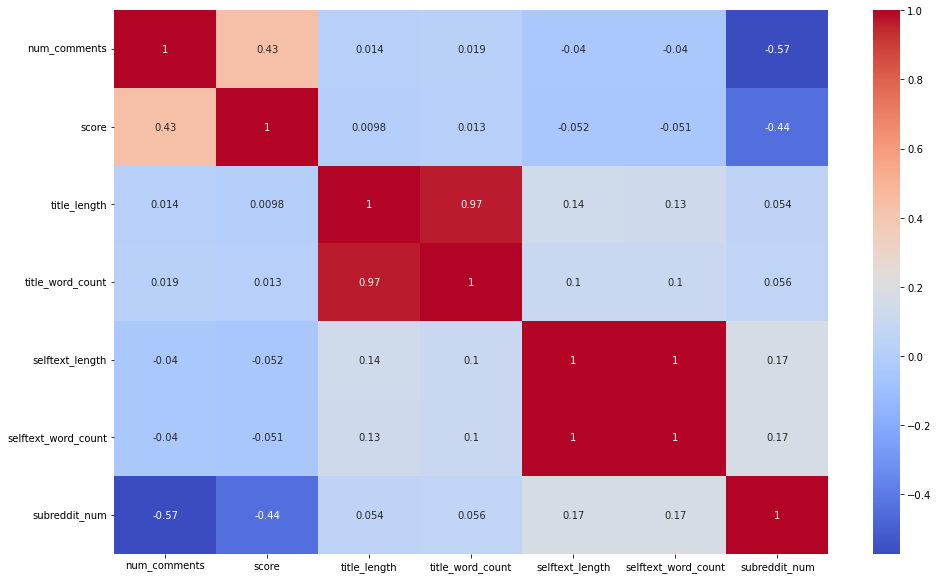

In [109]:
plt.figure(figsize=(16, 10))
sns.heatmap(
    df.corr(),
    annot=True,
    cmap='coolwarm'
    );

In [110]:
df.corr()

,num_comments,score,title_length,title_word_count,selftext_length,selftext_word_count,subreddit_num
num_comments,1.000000,0.433098,0.014500,0.019457,-0.039619,-0.040258,-0.573090
score,0.433098,1.000000,0.009796,0.012976,-0.051584,-0.051448,-0.444068
title_length,0.014500,0.009796,1.000000,0.967508,0.135574,0.131661,0.053651
title_word_count,0.019457,0.012976,0.967508,1.000000,0.100077,0.099545,0.055655
selftext_length,-0.039619,-0.051584,0.135574,0.100077,1.000000,0.997672,0.170614
selftext_word_count,-0.040258,-0.051448,0.131661,0.099545,0.997672,1.000000,0.173674
subreddit_num,-0.573090,-0.444068,0.053651,0.055655,0.170614,0.173674,1.000000


__EDA Conclusion 2:__ Interesting correlations in the heatmap that show strong relationships between number of comments and ups/scores. But, after talking with Devin about how the data gets saved from Reddit, it might not be smart to spend time working with the num_comments, ups, or scores since they may be outdated. 

## EDA on Word Counts

Utilizing CountVectorizer to count_vectorize the text in title and selftext columns. This converts text data into a structured, numeric dataframe where the *count* is how many times a token is observed, whereas the *vectorizer* is the column that stores those counts. 

In [111]:
cvex = CountVectorizer(lowercase=True, stop_words={'english'})

In [112]:
# title 
c_title = cvex.fit_transform(df['title'])
c_title
c_title = pd.DataFrame(c_title.todense(), columns=cvex.get_feature_names_out())
c_title

,00,10,100,100lb,100lbs,10m,10mo,10yo,10yr,11,11mo,11year,12,1200,120lb,12wk,13,13lb,13yo,13yrs,14,15,150lb,15yo,16,17,18,180,18h,18mo,19,19yo,1st,1y,1yo,1yr,20,200mg,2022,225,23lb,24,24hrs,27,2am,2f,2nd,2x,2y,2year,2yo,2yr,30,36,3d,3h,3mo,3month,3rd,3y,3year,3yo,3yr,4am,4h,4mo,4month,4th,4y,4years,4yo,4yom,4yr,50,500mg,50lbs,5am,5lb,5mo,5months,5mth,5mtrs,5yo,5yr,60,60lb,6m,6mo,6y,6yo,72,73,75lb,7f,7ft,7mo,7mon,7month,7mos,7th,7yo,80,80lb,8mo,8month,8mths,8y,8yo,90,99,9mo,9month,9y,abhors,ability,able,abnormal,about,above,abroad,absence,absolute,absolutely,abused,ac,acana,accept,acceptable,accepting,access,accident,accidental,accidentally,accidents,acclimate,acclimating,account,accuracy,accurate,acd,acid,acl,acquainting,acquired,acquisition,across,act,acted,acting,action,activated,active,actively,activities,activity,acts,actual,actually,adapted,add,addicted,adding,addition,additional,address,adenitis,adhd,adhesive,adjust,adjusting,administer,adolescence,adolescent,adopt,adopted,adoptee,adopting,adoption,adorable,adult,adulthood,advanced,advantage,advantix,advantus,adversion,advertised,advice,advise,advised,advocating,affect,affecting,affection,affectionate,afford,affordable,afraid,after,aftercare,afternoon,aftershock,afterwards,again,against,age,aggresive,aggression,aggressive,aggressively,aggressiveness,aggressivity,agility,agitated,ago,agoraphobic,agree,agresser,agression,agressive,agricultural,ah,ahead,aids,aim,air,airedale,airplanes,aita,akc,akita,alaskan,alert,alerted,alerting,alexa,all,allergen,allergic,allergies,allergy,allow,allowed,allowing,almost,alone,along,alopecia,alot,alpha,already,alright,also,alter,altering,alternative,alternatives,always,am,amazing,amazon,american,ammonium,amount,amounts,amp,amputation,an,anal,anaplasmosis,anchors,and,anemia,angel,angry,animal,animals,anipryl,anixety,ankle,ankles,annoyed,annoying,annual,another,answer,answers,ant,antagonizing,anti,antibiotic,antibiotics,anticipating,antiseptic,antler,anus,anuses,anxiety,anxioud,anxious,any,anybody,anymore,anyone,anything,anytime,anyway,anywhere,aparment,apart,apartment,apathetic,apbt,ape,apecific,apoquel,app,apparent,apparently,appartment,appeared,appears,appeasement,appetite,appetizing,apple,appliance,applied,apply,appointment,appreciate,appreciated,approach,approached,approaching,appropriate,appropriately,approve,approximate,apps,apricote,apsa,apt,are,area,areas,aren,argentino,arguing,arkansas,arm,armpit,armpits,arms,around,arousal,arrangements,arrive,arriving,arthritis,artist,as,asap,ashkii,aside,ask,asked,asking,asks,askvet,asleep,ass,assert,assertive,assess,assimilating,assistance,assistant,associate,associates,assuming,asthma,at,ate,atrophied,atrophy,attach,attached,attachement,attachment,attack,attacked,attacking,attacks,attempts,attention,attitude,attributed,attrition,audio,august,aussie,aussies,australian,autoimmune,automatic,autowalkies,available,avenue,aversion,aversive,aversives,avoid,avoidance,avoiding,avoids,awake,aware,away,awesome,awhile,awkward,axiety,babies,babka,baby,back,backchatting,backpack,backpackingdogs,backwards,backyard,bacon,bacteria,bad,badly,baffled,bag,bags,bait,balance,balanced,balancing,balcony,bald,ball,ballistic,balls,bandage,bandages,bane,bang,bank,banned,bar,bare,barely,barging,baring,bark,barked,barking,barks,barky,barn,barred,barrier,baseboards,based,basement,bashes,basic,basics,basis,basket,basset,bath,bathe,bathed,bathing,bathroom,baths,bathtime,bay,bc,be,beach,beaches,beagle,beagles,beaglier,beast,beat,beating,beats,became,because,become,becomes,...,tramadol,trampolines,trance,transitiening,transition,transitioning,translucent,transport,transporting,trap,trash,trauma,traumatized,travel,traveled,traveling,travelling,travels,trazodone,treadmill,treadmills,treasure,treat,treated,treating,treatment,treatments,treats,tree,trees,trembling,tremendously,tremor,tremors,tri,trials,trick,tricks,tricolor,tried,tries,trig,trigger,triggered,triggers,trim,trimmed,trimming,trio,trip,tripawd,tripawed,trips,trouble,tro

In [113]:
# selftext
c_selftext = cvex.fit_transform(df['selftext'])
c_selftext
c_selftext = pd.DataFrame(c_selftext.todense(), columns=cvex.get_feature_names_out())
c_selftext

,00,000,000sqft,00am,00pm,0530,0600,07,0700,0830,0900,10,100,1000,1000mg,100k,100lb,100lbs,100m,100mg,100s,101,103,1030,104,105,1050g,105lbs,10am,10cm,10ft,10hr,10hrs,10ish,10k,10kg,10lb,10lbs,10m,10meters,10mg,10mi,10min,10mins,10mo,10month,10months,10mos,10pm,10seconds,10th,10x,10x10,10yo,11,110,1100,110lb,110lbs,1130,117,11am,11ish,11l,11mo,11months,11p,11pm,11year,11years,11yo,11yr,12,120,1200,120lb,120lbs,1230,1230pm,125mg,127,12am,12hr,12hrs,12ish,12kg,12lb,12m,12mo,12month,12pm,12wks,12wo,12yo,13,130,130g,130lb,135,13lb,13lbs,13m,13yo,14,1400,140lb,1430,14ish,14kgs,14lbs,14month,14months,14mos,14th,14w,14wks,14yo,14yr,14yrs,15,150,1500,1500mg,150g,150ib,150lb,155,156,15am,15f,15kg,15lb,15lbs,15m,15min,15minutes,15mo,15month,15pm,15th,15w,15x,15yr,16,160,1600,1630,16ish,16kg,16kgs,16lbs,16mg,16mo,16th,16wk,16y,17,1700,175,17g,17kg,17lbs,17mo,18,180,1800,18h,18ish,18kg,18lbs,18m,18mo,18months,18th,19,1900,19lbs,1am,1b,1br,1c,1cm,1cup,1h,1hr,1in,1ish,1k,1lb,1m,1ml,1mm,1mo,1on1,1pm,1st,1x,1y,1y3m,1y4m,1y8m,1year,1years,1yo,1yr,1yro,1⅓year,20,200,2000,2003,2004,2006,2009,200lb,200mg,200yards,2010,2011,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,20cm,20ft,20ish,20kg,20lb,20lbs,20m,20mg,20min,20minutes,20mo,20s,20th,20x,20x40,21,210,2130,22,220lbs,22c,22f,22lb,22lbs,23,2300,230am,230pm,23l,23lb,23y,24,245,24f,24hr,24hrs,24pethealth,24th,25,250,2500,250g,250mg,25f,25ish,25kg,25lb,25lbs,25mg,25th,26,26f,26h,26m,27,27f,27lb,27th,28,28kg,28lbs,28th,29,2am,2br,2c,2days,2f,2h,2hounds,2hours,2hrs,2in,2ish,2k,2kg,2kgs,2m,2min,2mm,2mo,2month,2months,2mos,2nd,2play,2pm,2vlldna,2x,2x5,2xs,2y,2y3m,2year,2yo,2yom,2yr,2yrs,30,300,3000,30a,30am,30cm,30ft,30ish,30k,30kg,30lb,30lbs,30llbs,30m,30min,30mins,30minute,30p,30pm,30seconds,30x,31,31m,32,32m,32ml,33,333,335,3360,3379,33kg,33lb,34,3432,348,34am,35,350,3500,35kg,35lb,35lbs,36,360,365,36lbs,37,3775,38,3825,384,38lbs,39,3am,3ccs,3d,3drops,3f,3h,3hours,3hrs,3ish,3k,3labs,3lb,3lbs,3m,3mo,3month,3months,3pm,3rd,3s,3x,3y,3year,3yo,3yr,3yrold,3yrs,40,400,400g,400mg,40c,40ish,40kg,40lb,40lbs,40min,40mins,40s,41,42,428,42lbs,43,430,43lb,44kg,44lb,45,450,45am,45kgs,45lb,45lbs,45min,45mins,46,460,47,475,47lbs,48,48h,49,4am,4c,4dx,4f,4ft,4h,4health,4hours,4hrs,4ish,4k,4kg,4l,4lb,4lbs,4m,4min,4mo,4months,4monthsold,4oz,4pm,4th,4ths,4x,4y,4yo,4yr,4yrs,50,500,5000,500g,500ml,500sq,50c,50ft,50g,50ish,50kg,50lb,50lbs,50m,50mg,50usd,51,530,545,54lb,55,55f,55lb,55lbs,...,whackadoodle,whale,wharf,what,whatever,whatnot,whats,whatsoever,wheat,wheaten,wheaton,wheb,wheel,wheelbarrow,wheelchair,wheeler,wheelers,wheels,wheezing,whelp,whelping,when,whenever,whens,whenver,where,whereabouts,whereas,wherein,wherever,whether,which,whichever,whiff,while,whilst,whim,whimper,whimpered,whimpering,whimpers,whimzee,whimzies,whine,whined,whiner,whines,whiney,whinge,whining,whinning,whinny,whiny,whip,whiplash,whipped,whippet,whipping,whipworm,whiskers,whiskey,whisper,whispy,whist,whistle,whistled,whistles,whistling,white,whitefish,whitening,whites,whitest,whits,who,whoever,whoknows,whole,wholeheartedly,wholesome,wholly,whom,whooping,whoops,whopping,whore,whos,whose,whove,why,whyyyyyy,wi,wich,wicker,wide,wider,widow,width,wiener,wierd,wife,wiggle,wiggles,wiggling,wiggly,wiglo,wik,wiki,wil,wild,wilderness,wildest,wildfires,wildlife,wildly,wildness,wiling,will,willed,willing,willingly,willingness,willow,willpower,willy,wimp,wimper,wimpy,win,wince,wind,windchill,winded,windiness,winding,window,windows,windowsill,windpipe,winds,windshield,windy,wine,wines,wing,wings,wini,wining,wink,winkie,winner,wins,winston,winsy,winter,winters,wip,wipe,wiped,wipers,wipes,wiping,wire,wired,wirehaired,wireless,wires,wiring,wiry,wisdom,wise,wish,wishes,wishful,wishing,wit,witch,witching,with,withdrawals,withdrawing,withdraws,withering,withheld,withhold,withholding,within,withing,without,witness,witnessed,witnesses,witnessing,wits,witt,wittle,witts,wives,wiĺ,wk,wks,wlel,wobble,wobbler,wobbles,wobblies,wobbly,wodnering,woke,woken,wolf,wo

### The 15 most common words

Will show common words for both Title and Selftext. Removing stopwords because the original set of 15 were primarily stop words. 

In [114]:
# title: 15 common words
c_title.sum().sort_values(ascending=False).head(15)

dog         3396
to          1951
my          1844
and          909
the          850
for          775
is           775
with         753
how          731
puppy        716
help         700
on           678
in           601
dogs         555
training     537
dtype: int64

In [115]:
# selftext: 15 common words
c_selftext.sum().sort_values(ascending=False).head(15)

and    41920
to     41807
the    37929
he     24327
she    19091
is     16296
it     16222
her    15808
my     14819
we     14810
in     14720
of     14526
but    13490
him    13320
dog    12342
dtype: int64

### Frequency of the 15 most common words as bar chart


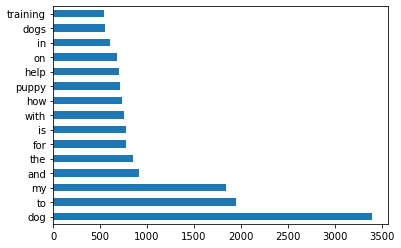

In [116]:
# title: frequency bar chart
c_title.sum().sort_values(ascending=False).head(15).plot(kind='barh');

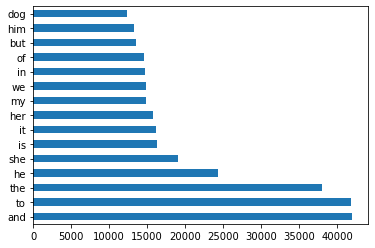

In [117]:
# selftext: frequency bar chart
c_selftext.sum().sort_values(ascending=False).head(15).plot(kind='barh');

In [118]:
# investigating 'don'
# [selftext for selftext in df['selftext'] if 'don' in selftext.lower()][:10]
# viewed the top ten for the word 'don', but I think it is pulling into the most frequently used because of the contraction "don't"

In [119]:
# investigating 'zola'
#[selftext for selftext in df['selftext'] if 'zola' in selftext.lower()][:10]
# viewed the top ten for the word 'zola'. In conclusion, it is a dog's name. There are multiple selftext entries that are all the same, 
# where the author is requesting advice for their dog Zola who is displaying agressive behaviors. I find it interesting that there seems to be the same entry multiple times. 

In [120]:
c = pd.DataFrame()

p = df.groupby(df['subreddit_num']).mean()[['title_length', 'title_word_count']]
q = df.groupby(df['subreddit_num']).mean()[['selftext_length', 'selftext_word_count']]
print(p)
print()
print(q)

               title_length  title_word_count
subreddit_num                                
0                 43.806175          8.034734
1                 47.138559          8.717797

               selftext_length  selftext_word_count
subreddit_num                                      
0                   755.048027           144.900943
1                  1034.766102           199.102966


__EDA Conclusion 3__ The Dog Training Subreddit has more text in both the title and selftext areas compared to the Dog Care Subreddit. This makes sense at this time because of the Dog Care text is one third fo all the text.

### Tokenizing, Lemmatizing/Stemming, and removing special characters as preprocessing.

In [163]:
# Character removal:

# remove "&amp;" as result of ampersand
df['text'] = df['text'].map(lambda x: x.replace('&amp;', ''))

# remove "&amp;" as result of ampersand
df['text'] = df['text'].map(lambda x: x.replace('**', ''))

# remove \n breaks
df['text'] = df['text'].map(lambda x: x.replace('\n', ' '))

In [164]:
# lemmatizer/stemmer

port_stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [165]:
# tokenizing for lemmatizing/stemming
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
df['text'] = df['text'].transform(tokenizer.tokenize)

# lemmatizing/stemming
for list in df['text']:
    [port_stemmer.stem(x) for x in list]
    [lemmatizer.lemmatize(x) for x in list]

# joining lists back together
df['text'] = df['text'].map(lambda x: ' '.join(x))

In [166]:
df.head()

,num_comments,score,selftext,subreddit,title,text,title_length,title_word_count,selftext_length,selftext_word_count,subreddit_num
0,1,1,Hi. I have a one-year-old golden retriever who...,Dogtraining,Can a one-year-old golden retriever be leash t...,Can a one -year-old golden retriever be leash ...,53,8,190,37,1
1,1,1,Recently my 13 week old rott/ lab has started ...,Dogtraining,Puppy nipping,Puppy nipping Recently my 13 week old rott / l...,13,2,414,83,1
2,1,1,"Hey y'all, \n\n\nSo my fiancee and I just mo...",Dogtraining,9-year-old dog won't poop or pee at our new house,9 -year-old dog won 't poop or pee at our new ...,49,10,1473,291,1
3,3,1,Like the title said we recently (as in late Fr...,Dogtraining,Just recently acquired rehomed an 8 month old ...,Just recently acquired rehomed an 8 month old ...,61,10,2280,465,1
4,1,1,"We got our Aussie about a year ago, around tha...",Dogtraining,My dog loves the water too much.,My dog loves the water too much . We got our A...,32,7,1619,318,1


In [167]:
# save as .csv for use in modeling
df.to_csv('../data/prepped.csv', index=False)

### EDA Conclusions and Notes

In [168]:
# BASELINE
df['subreddit_num'].mean()

0.6693136698808848